In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
adv_rag = pd.read_csv('../../data/MainDataset/results/Official/Advanced_RAG.csv')
naive_rag = pd.read_csv('../../data/MainDataset/results/Official/naive_RAG.csv')
no_rag = pd.read_csv('../../data/MainDataset/results/Official/llama-8b-8192.csv')

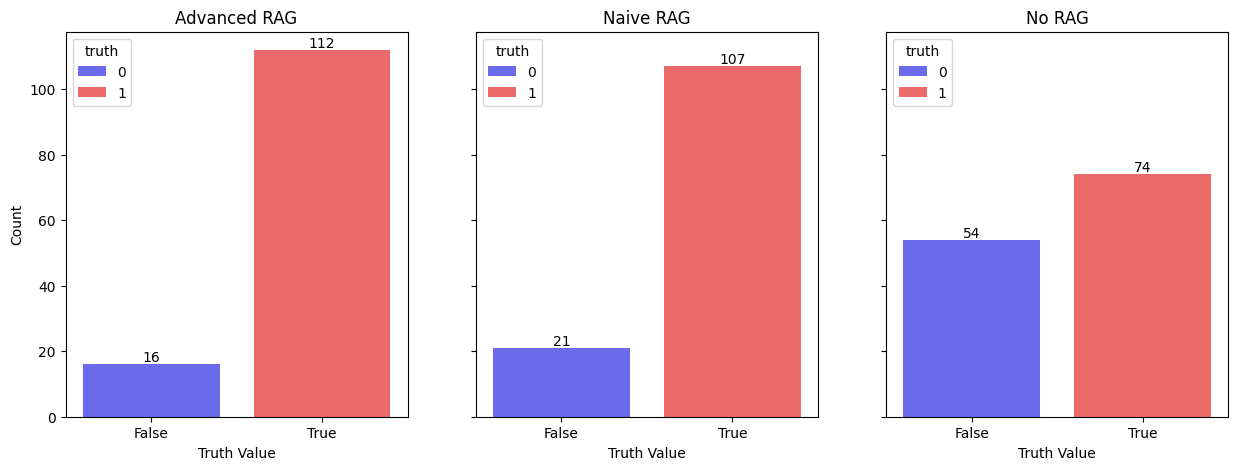

In [3]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True) 
plt.title('Comparison of Methods Truth Counts')

sns.countplot(data=adv_rag, x='truth', hue='truth', palette='seismic', ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].bar_label(axes[0].containers[1])
axes[0].set_title('Advanced RAG')

sns.countplot(data=naive_rag, x='truth', hue='truth', palette='seismic', ax=axes[1])
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Naive RAG')

sns.countplot(data=no_rag, x='truth', hue='truth', palette='seismic', ax=axes[2])
axes[2].bar_label(axes[2].containers[0])
axes[2].bar_label(axes[2].containers[1])
axes[2].legend(loc='upper left',title="truth")
axes[2].set_title('No RAG')

axes[0].set_ylabel('Count')
for ax in axes:
    ax.set_xlabel('Truth Value')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['False', 'True'])


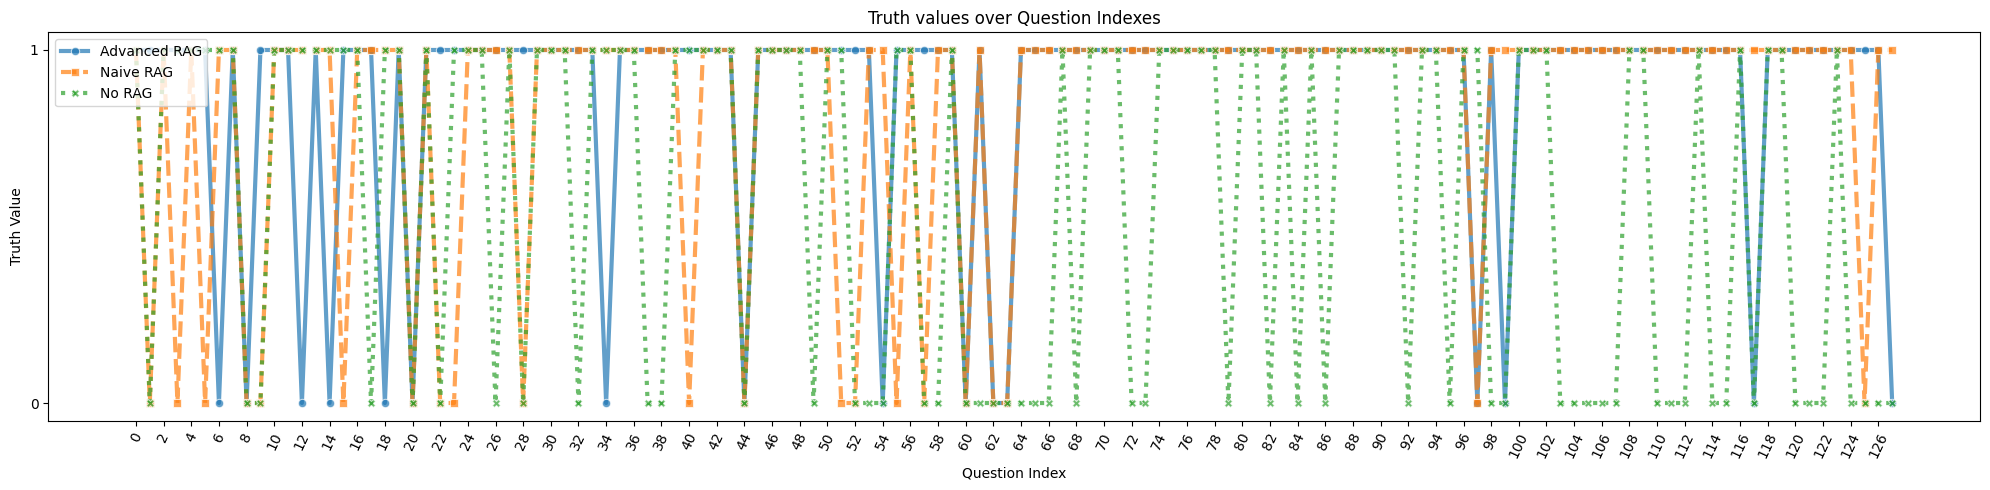

In [4]:
plt.figure(figsize=(20,5))
plt.title('Truth values over Question Indexes')
colors = sns.color_palette("tab10")
fig = sns.lineplot(data=adv_rag, x=adv_rag.index, y='truth',marker='o', linestyle='-',color=colors[0],label='Advanced RAG',alpha=0.7,linewidth=3)
fig.set_xticks(range(0,127,2))
fig.set_yticks([0,1])

fig1 = sns.lineplot(data=naive_rag, x=naive_rag.index, y='truth',marker='s', linestyle='--',color=colors[1],label='Naive RAG',alpha=0.7,linewidth=3)


fig2 = sns.lineplot(data=no_rag, x=adv_rag.index, y='truth',marker='X', linestyle=':',color=colors[2],label='No RAG',alpha=0.7,linewidth=3)


plt.legend(loc='upper left')
plt.xticks(rotation=65)
plt.xlabel('Question Index')
plt.ylabel('Truth Value')
plt.tight_layout()
plt.show()

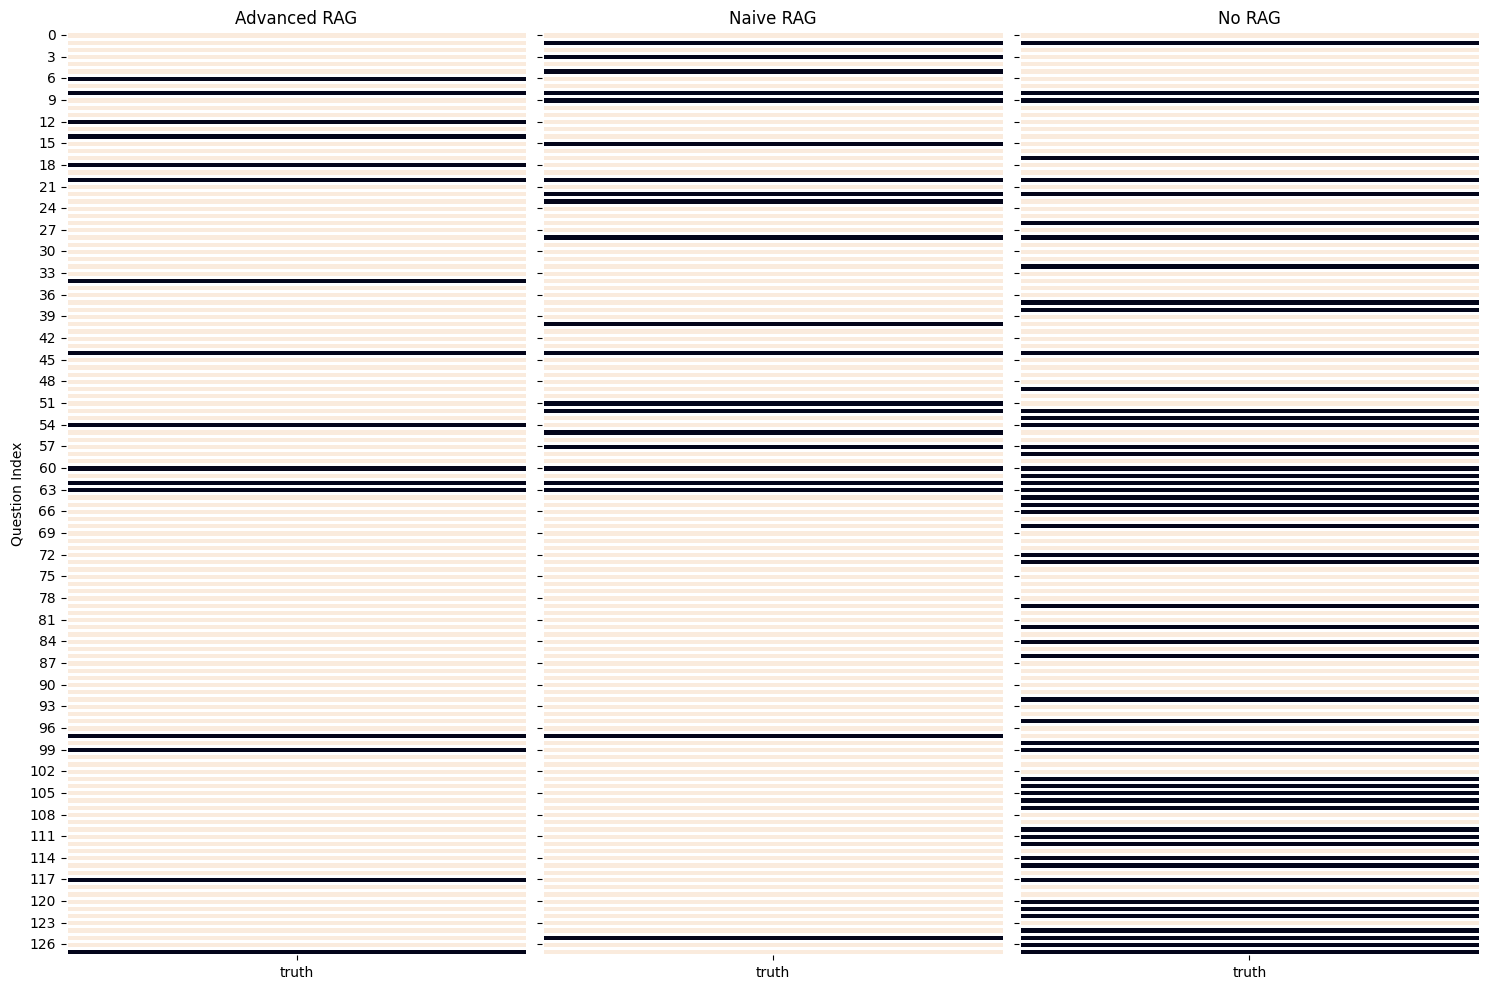

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)

sns.heatmap(data=adv_rag[['truth']], cbar=False, linewidths=1, ax=axes[0])
axes[0].set_title('Advanced RAG')
axes[0].set_ylabel('Question Index')

sns.heatmap(data=naive_rag[['truth']], cbar=False, linewidths=1, ax=axes[1])
axes[1].set_title('Naive RAG')

sns.heatmap(data=no_rag[['truth']], cbar=False, linewidths=1, ax=axes[2])
axes[2].set_title('No RAG')

plt.tight_layout()
plt.show()


In [6]:
def accuracy_score(df):
    return (len(df[df['truth']==1])/128)*100

In [7]:
df_acc= pd.DataFrame(columns=['method','accuracy'])
df_acc.loc[0] = ['Advanced RAG',accuracy_score(adv_rag)]
df_acc.loc[1] = ['Naive RAG',accuracy_score(naive_rag)]
df_acc.loc[2] = ['No RAG',accuracy_score(no_rag)]

In [8]:
df_acc

,method,accuracy
0,Advanced RAG,87.50000
1,Naive RAG,83.59375
2,No RAG,57.81250


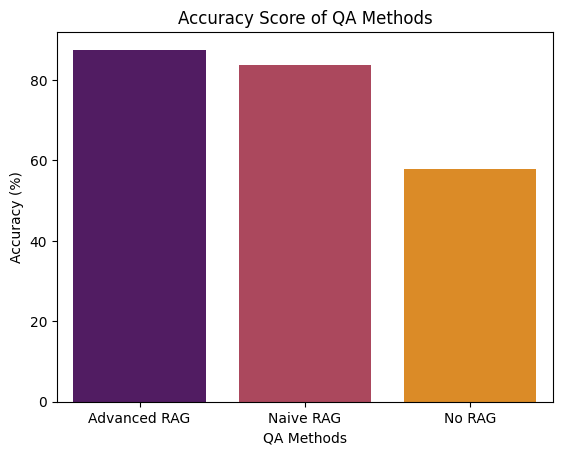

In [9]:
plt.title('Accuracy Score of QA Methods')
fig = sns.barplot(data=df_acc,x='method',y='accuracy',hue=df_acc['method'],palette='inferno')
plt.ylabel('Accuracy (%)')
plt.xlabel('QA Methods')
plt.show()

In [70]:
df_token = pd.read_csv('../../data/Metrics/token_eval.csv')

In [71]:
df_token

,method,precision,recall,f1_score
0,Advanced RAG,0.386138,0.695733,0.442020
1,Naive RAG,0.359226,0.692159,0.416310
2,No RAG,0.239094,0.396227,0.266087


In [47]:
df_token_melt = df_token.melt(id_vars=['method'], value_vars=['precision', 'recall', 'f1_score'], 
                    var_name='metric', value_name='score')

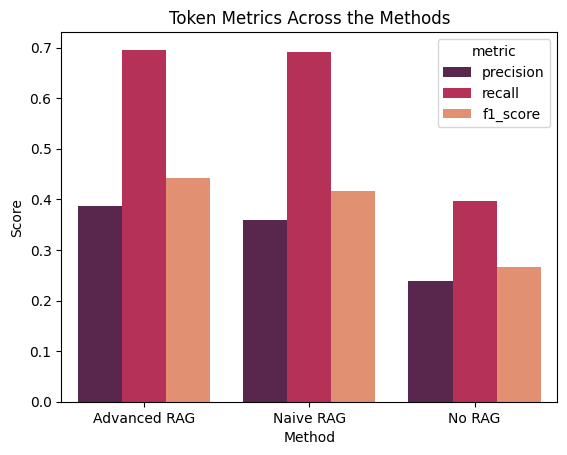

In [48]:
plt.title('Token Metrics Across the Methods')
sns.barplot(data=df_token_melt,x='method',y='score',hue='metric', palette='rocket')
plt.xlabel('Method')
plt.ylabel('Score')
plt.show()

In [60]:
import plotly.graph_objects as go

In [102]:
fig = go.Figure()



fig.add_trace(go.Scatterpolar(
    r=df_token[df_token['method']=="Naive RAG"][['precision','recall','f1_score']].values[0],
    theta=['precision','recall','f1_score'],
    fill='toself',
    name='Naive RAG',
    line_color='blue',
    opacity=0.8
))
fig.add_trace(go.Scatterpolar(
    r=df_token[df_token['method']=="Advanced RAG"][['precision','recall','f1_score']].values[0],
    theta=['precision','recall','f1_score'],
    fill='toself',
    name='Advanced RAG',
    line_color='purple',
    opacity=0.5
))

fig.add_trace(go.Scatterpolar(
    r=df_token[df_token['method']=="No RAG"][['precision','recall','f1_score']].values[0],
    theta=['precision','recall','f1_score'],
    fill='toself',
    name='No RAG',
    line_color='red',
    opacity=0.8
))


fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  
        )),
    title="Comparison of Precision, Recall, and F1 Score)",
    showlegend=True,
    width=600, 
    height=600,
    template='seaborn'
)

# Show the plot
fig.show()